In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/baseball.csv')
df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


## Project Description
This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success. There are 16 different features that will be used as the inputs to the machine learning and the output will be a value that represents the number of wins. 

## EDA

In [3]:
df.shape

(30, 17)

In [4]:
# so we have 30 rows and 17 columns in which W is out target column

In [5]:
df.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

In [6]:
df.columns.tolist()

['W',
 'R',
 'AB',
 'H',
 '2B',
 '3B',
 'HR',
 'BB',
 'SO',
 'SB',
 'RA',
 'ER',
 'ERA',
 'CG',
 'SHO',
 'SV',
 'E']

In [7]:
# Checking the data type of columns
df.dtypes

W        int64
R        int64
AB       int64
H        int64
2B       int64
3B       int64
HR       int64
BB       int64
SO       int64
SB       int64
RA       int64
ER       int64
ERA    float64
CG       int64
SHO      int64
SV       int64
E        int64
dtype: object

In [8]:
# All are numberic datatype

In [9]:
# checking the null value in dataset

df.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

In [10]:
# we can see no null values present in the dataset

In [11]:
# check the info about the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


In [12]:
# Checking the unique values in the dataset
for column in df.columns:
    print("Column Name:", column)
    print("Number of Unique Values:", df[column].nunique())
    print("\n")

Column Name: W
Number of Unique Values: 24


Column Name: R
Number of Unique Values: 28


Column Name: AB
Number of Unique Values: 29


Column Name: H
Number of Unique Values: 29


Column Name: 2B
Number of Unique Values: 22


Column Name: 3B
Number of Unique Values: 23


Column Name: HR
Number of Unique Values: 27


Column Name: BB
Number of Unique Values: 29


Column Name: SO
Number of Unique Values: 29


Column Name: SB
Number of Unique Values: 27


Column Name: RA
Number of Unique Values: 30


Column Name: ER
Number of Unique Values: 30


Column Name: ERA
Number of Unique Values: 30


Column Name: CG
Number of Unique Values: 9


Column Name: SHO
Number of Unique Values: 12


Column Name: SV
Number of Unique Values: 20


Column Name: E
Number of Unique Values: 21




In [14]:
df['W'].unique()

array([ 95,  83,  81,  76,  74,  93,  87,  80,  78,  88,  86,  85,  68,
       100,  98,  97,  64,  90,  71,  67,  63,  92,  84,  79], dtype=int64)

In [15]:
# Our output is regession data so this is a r=regression problem

In [16]:
# checking the statistical value
df.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


In [17]:
# we can observe count of all columns is equal means no missing data
# Mean vaulue and 50% of the all columns approx equal mean less chance of skewness
# Max value is also look fine mean less chance of outliers

## Graphical analysis

In [18]:
df.head(1)

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88


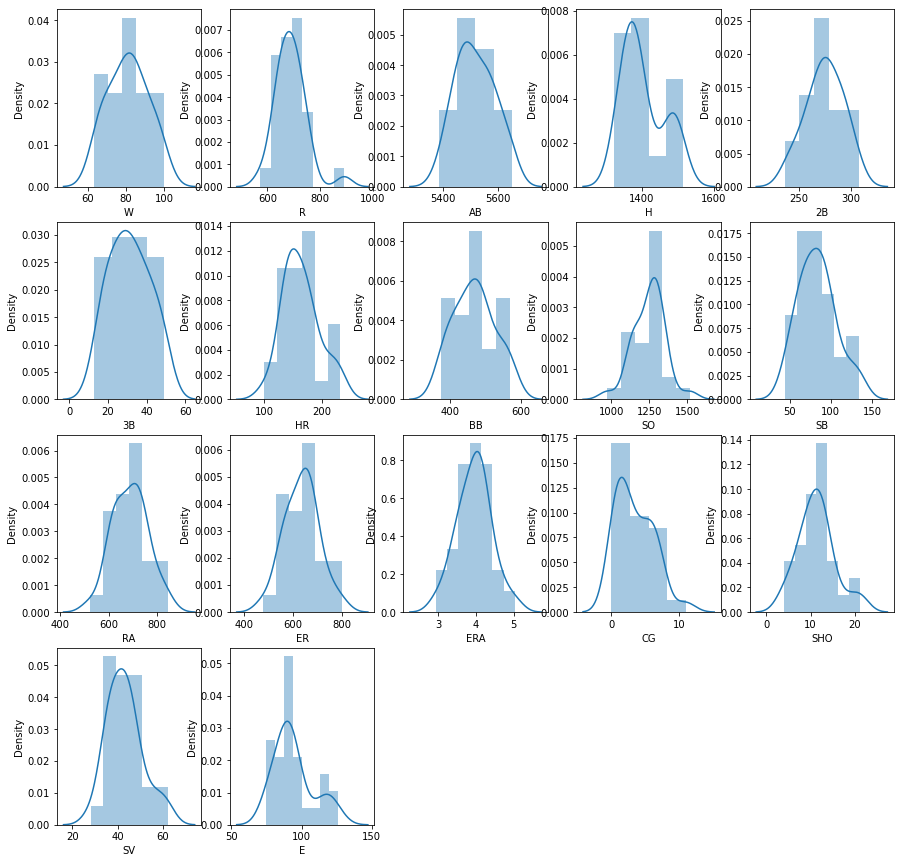

In [22]:
# Check the distribution of th dataset
plt.figure(figsize=(15,15))
plotnumber=1

for i in df.columns:
    if plotnumber<=20:
        ax=plt.subplot(4,5,plotnumber)
        sns.distplot(df[i])
        plt.xlabel(i,fontsize=10)
    plotnumber+=1
plt.show()

In [23]:
# Distribution of all the dataset look fine normally distributed

In [24]:
# Now we will check the relation between independent feature and target frature

In [25]:
x=df.drop(columns=['W'])
y=df['W']

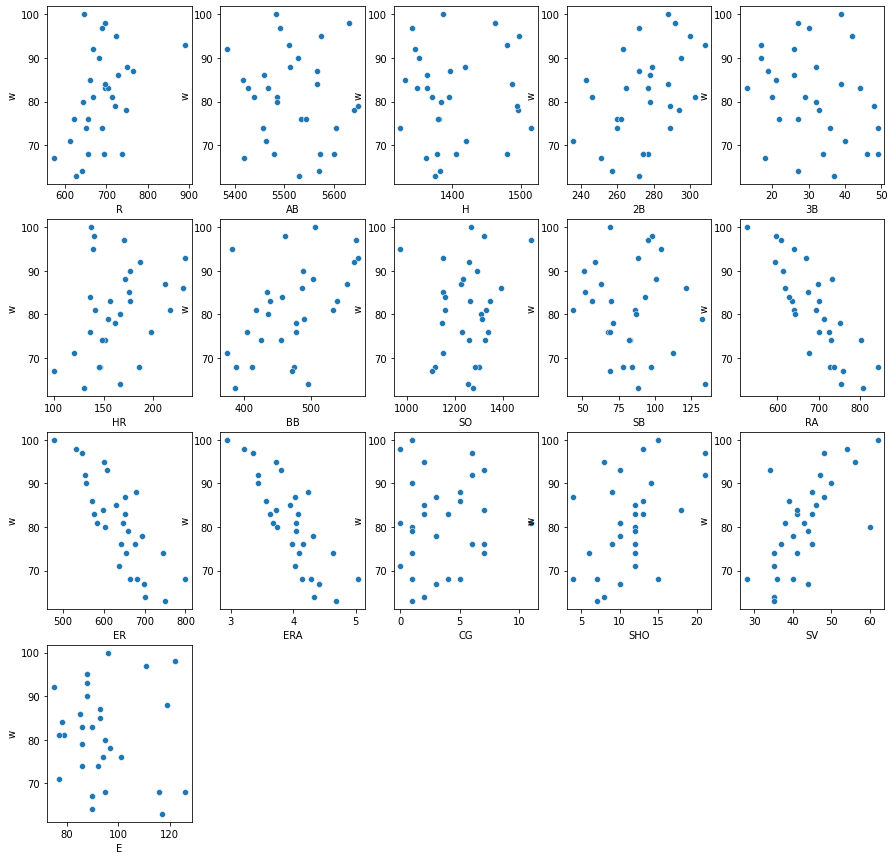

In [30]:
plt.figure(figsize=(15,15))
plotnumber=1

for i in x:
    if plotnumber<=20:
        axs=plt.subplot(4,5,plotnumber)
        sns.scatterplot(x[i],y)
        plt.xlabel(i,fontsize=10)
        plt.ylabel('w',fontsize=10)
    plotnumber+=1
plt.show()

In [33]:
# We will check the correlation between the columns and target feature
corr=df.corr()
corr

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
W,1.000000,0.430751,-0.087947,0.037612,0.427797,-0.251118,0.307407,0.484342,0.111850,-0.157234,-0.812952,-0.809435,-0.819600,0.080533,0.471805,0.666530,-0.089485
R,0.430751,1.000000,0.319464,0.482856,0.560084,-0.070072,0.671283,0.402452,-0.054726,0.081367,-0.041623,-0.041245,-0.049281,0.232042,-0.103274,-0.096380,-0.023262
AB,-0.087947,0.319464,1.000000,0.739122,0.453370,0.435422,-0.066983,-0.136414,-0.106022,0.372618,0.316010,0.309686,0.255551,-0.080876,-0.197321,-0.106367,0.316743
H,0.037612,0.482856,0.739122,1.000000,0.566847,0.478694,-0.090855,-0.118281,-0.398830,0.413444,0.224324,0.252489,0.231172,0.147955,-0.145559,-0.130371,-0.033173
2B,0.427797,0.560084,0.453370,0.566847,1.000000,0.220490,0.056292,0.302700,-0.150752,0.195027,-0.218160,-0.235531,-0.254854,0.306675,0.057998,0.171576,0.105754
3B,-0.251118,-0.070072,0.435422,0.478694,0.220490,1.000000,-0.430915,-0.454949,-0.141196,0.457437,0.314125,0.340225,0.330951,-0.065898,-0.041396,-0.142370,0.126678
HR,0.307407,0.671283,-0.066983,-0.090855,0.056292,-0.430915,1.000000,0.425691,0.359923,-0.136567,-0.103903,-0.085922,-0.090917,0.156502,-0.019119,-0.028540,-0.207597
BB,0.484342,0.402452,-0.136414,-0.118281,0.302700,-0.454949,0.425691,1.000000,0.233652,-0.098347,-0.416445,-0.452663,-0.459832,0.462478,0.426004,0.099445,-0.075685
SO,0.111850,-0.054726,-0.106022,-0.398830,-0.150752,-0.141196,0.359923,0.233652,1.000000,0.030968,-0.129745,-0.161612,-0.180368,-0.093418,0.237721,0.126297,0.155133
SB,-0.157234,0.081367,0.372618,0.413444,0.195027,0.457437,-0.136567,-0.098347,0.030968,1.000000,0.132290,0.143068,0.126063,-0.020783,-0.106563,-0.183418,0.079149


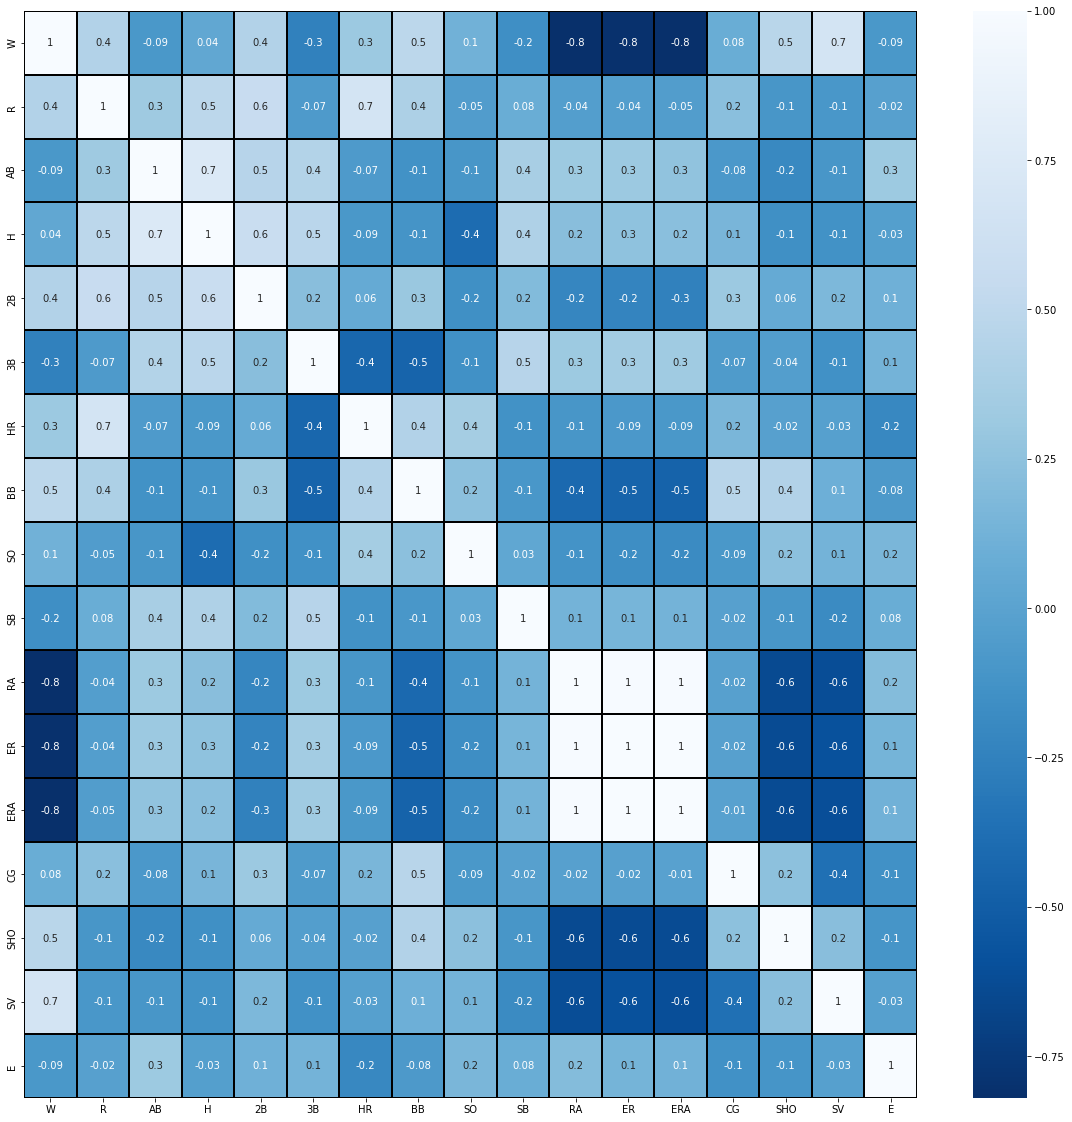

In [37]:
# lets visulize in heatmap
plt.figure(figsize=(20,20))
sns.heatmap(corr, annot=True, linecolor='black', cmap='Blues_r', fmt='.1g',linewidths=0.1)
plt.show()

In [38]:
# We can observe that ER & ERA has very high positive relation with RA and ER


In [39]:
# Standardise the dataset
x=df.drop(columns=['W'])
y=df['W']

In [40]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

x=scaler.fit_transform(x)

# Model building

In [41]:
# Train Test split the datset
from sklearn.model_selection import train_test_split

In [55]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)

In [56]:
from sklearn.linear_model import LinearRegression 
LR=LinearRegression()
LR.fit(x_train,y_train)
pred_LR=LR.predict(x_test)

In [57]:
LR.score(x_train,y_train)

0.9821059744417344

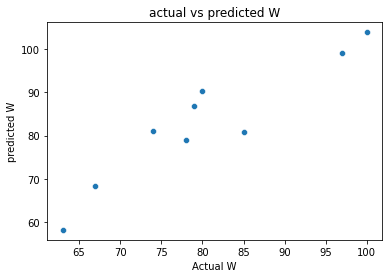

In [58]:
sns.scatterplot(y_test,pred_LR)
plt.xlabel('Actual W')
plt.ylabel('predicted W')
plt.title('actual vs predicted W')
plt.show()

In [59]:
LR.score(x_test,y_test)

0.7692581763754476

In [60]:
from sklearn.ensemble import RandomForestRegressor

In [61]:
RFR=RandomForestRegressor()
RFR.fit(x_train,y_train)
RFR.score(x_train,y_train)

0.8904055455255196

In [62]:
RFR_pred=RFR.predict(x_test)
RFR.score(x_test,y_test)

0.6528569306930694

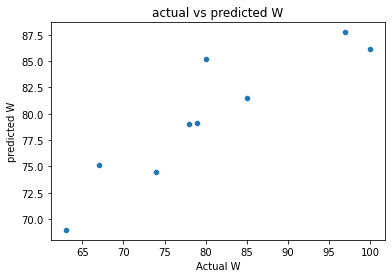

In [63]:
sns.scatterplot(y_test,RFR_pred)
plt.xlabel('Actual W')
plt.ylabel('predicted W')
plt.title('actual vs predicted W')
plt.show()